In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
# Parameters
DECK_SIZE = 52
HAND_SIZE = 13
N_TRIALS = 10000

In [156]:
# Calculate largest gap in circular array
def calc_largest_gap(slots, n_slots):
    # Sort the chosen slots
    slots_sorted = np.sort(slots)
    # Calculate gaps between consecutive slots
    gaps = np.diff(slots_sorted, append=slots_sorted[0] + n_slots)
    return np.max(gaps)

In [157]:
# Calculate gaps at both ends of linear array
def calc_end_gaps(slots, n_slots):
    # Sort the chosen slots
    slots_sorted = np.sort(slots)
    # Calculate gaps for both ends
    lower_end_gap = slots_sorted[0]
    upper_end_gap = n_slots - slots_sorted[-1]
    # Calculate gaps at both ends
    return lower_end_gap + upper_end_gap

In [158]:
# Find min and max in wrapped array
def reorder_hand(slots, n_slots):
    # Sort the chosen slots
    slots_sorted = np.sort(slots)
    # Find min and max in wrapped array
    max_gap = 0
    min_idx = None
    max_idx = None
    for i in range(len(slots_sorted) - 1):
        gap = slots_sorted[i+1] - slots_sorted[i]
        if gap > max_gap:
            max_gap = gap
            min_idx = slots_sorted[i+1]
            max_idx = slots_sorted[i]
    
    # Check wrap-around gap
    wrap_around_gap = slots_sorted[0] + n_slots - slots_sorted[-1]
    if wrap_around_gap > max_gap:
        max_gap = wrap_around_gap
        min_idx = slots_sorted[0]
        max_idx = slots_sorted[-1]

    start_idx = np.where(slots_sorted == min_idx)[0][0]
    reordered_slots = np.concatenate((slots_sorted[start_idx:], slots_sorted[:start_idx]))

    return reordered_slots

In [159]:
# Compute cards eliminated in wraparound min-max by round
def wrap_elimination(hand):
    elim_count_by_round = np.zeros(HAND_SIZE - 1)
    min_idx = None
    max_idx = None
    
    for i in range(HAND_SIZE - 1):
        if i % 2 == 0:
            min_idx = hand.pop(0)
            if i == 0:
                elim_count_by_round[i] = 3
            else:
                elim_count_by_round[i] = (min_idx - max_idx) % DECK_SIZE - 1
        else:
            max_idx = hand.pop(-1)
            elim_count_by_round[i] = (min_idx - max_idx) % DECK_SIZE - 1

    return elim_count_by_round

In [160]:
# Compute cards eliminated in linear min-max by round
def linear_elimination(hand):
    elim_count_by_round = np.zeros(HAND_SIZE - 1)
    min_idx = None
    max_idx = None

    for i in range(HAND_SIZE - 1):
        if i % 2 == 0:
            min_idx = hand.pop(0)
            if i == 0:
                elim_count_by_round[i] = min_idx
            else:
                elim_count_by_round[i] = min_idx + DECK_SIZE - max_idx - 1
        else:
            max_idx = hand.pop(-1)
            elim_count_by_round[i] = min_idx + DECK_SIZE - max_idx - 1

    return elim_count_by_round

In [168]:
# Simulate the process
largest_gaps = []
end_gaps = []
cards_eliminated_wrap = np.zeros((N_TRIALS, HAND_SIZE - 1))
cards_eliminated_linear = np.zeros((N_TRIALS, HAND_SIZE - 1))

for i in range(N_TRIALS):
    # Randomly choose 13 unique slots
    chosen_hand = np.random.choice(DECK_SIZE, HAND_SIZE, replace=False)

    # Calculate the largest gap
    gap = calc_largest_gap(chosen_hand, DECK_SIZE)
    ends = calc_end_gaps(chosen_hand, DECK_SIZE)
    largest_gaps.append(gap)
    end_gaps.append(ends)

    # Reorder hand based on wrap-around min-max
    reordered_hand = reorder_hand(chosen_hand, DECK_SIZE)
    sorted_hand = np.sort(chosen_hand)

    # Compute cards eliminated in both cases
    cards_eliminated_wrap[i, :] = wrap_elimination(list(reordered_hand))
    cards_eliminated_linear[i, :] = linear_elimination(list(sorted_hand))

# Calculate the average largest gap
expected_largest_gap = np.mean(largest_gaps)
expected_end_gaps = np.mean(end_gaps)
print(f'Expected largest gap: {expected_largest_gap}, expected end gaps: {expected_end_gaps}, difference: {expected_largest_gap - expected_end_gaps}')

# Calculate the average number of cards eliminated in both cases
expected_cards_eliminated_wrap = np.mean(cards_eliminated_wrap, axis=0)
expected_cards_eliminated_linear = np.mean(cards_eliminated_linear, axis=0)
difference = expected_cards_eliminated_wrap - expected_cards_eliminated_linear
cumulative_difference = np.cumsum(difference)
print(f'Expected cards eliminated in wrap-around min-max: {expected_cards_eliminated_wrap}')
print(f'Expected cards eliminated in linear min-max: {expected_cards_eliminated_linear}')
print(f'Difference: {difference}')


Expected largest gap: 11.5103, expected end gaps: 6.6338, difference: 4.876500000000001
Expected cards eliminated in wrap-around min-max: [ 3.     10.5103 13.8825 17.2314 20.6446 23.9696 27.3303 30.6754 34.0754
 37.4735 40.8453 44.2121]
Expected cards eliminated in linear min-max: [ 2.8152  5.6338  9.4563 13.2353 17.0467 20.8278 24.6024 28.3448 32.0821
 35.8182 39.5958 43.3825]
Difference: [0.1848 4.8765 4.4262 3.9961 3.5979 3.1418 2.7279 2.3306 1.9933 1.6553
 1.2495 0.8296]


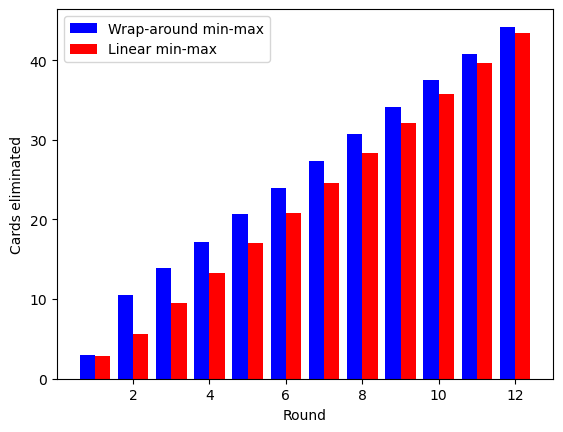

In [170]:
# Plot comparison of cards eliminated by round
rounds = np.arange(1, HAND_SIZE)
bar_width = 0.4
r1 = rounds - bar_width / 2
r2 = rounds + bar_width / 2

plt.bar(r1, expected_cards_eliminated_wrap, width=bar_width, color='b', label='Wrap-around min-max')
plt.bar(r2, expected_cards_eliminated_linear, width=bar_width, color='r', label='Linear min-max')
plt.xlabel('Round')
plt.ylabel('Cards eliminated')
plt.legend()
plt.savefig('cards_eliminated.png')
plt.show()

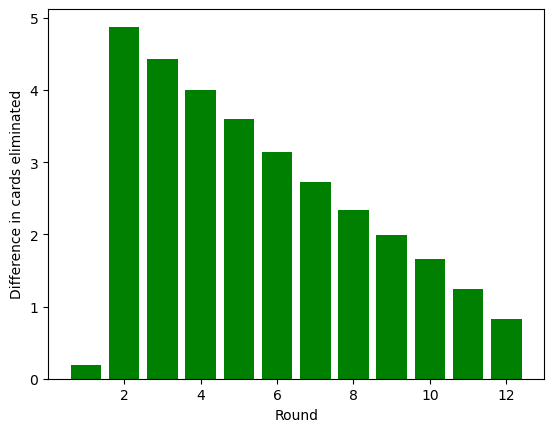

In [171]:
# Plot difference in cards eliminated by round
plt.bar(rounds, difference, color='g')
plt.xlabel('Round')
plt.ylabel('Difference in cards eliminated')
plt.savefig('difference.png')
plt.show()

In [ ]:
# Simulations against each group, playing as NS
scores_wrap = [
    (85.43, 86.48),
    (85.08, 81.19),
    (85.61, 88.71),
    (89.86, 75.22),
    (85.64, 93.04),
    (86.33, 85.82),
    (85.08, 80.00),
    (89.17, 84.01),
    
]